In [23]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

In [ ]:
!pip install pylatexenc

In [ ]:
import qiskit
import pylatexenc

In [ ]:
# ibm id:
# 7a31b765e519ab16da85b8d03351b980388901e70cb1170057c90c1c7fda8f279e25e7e8a253143642367af9e09d071c54c69eff8a411cb229b7ee5c5c7d7cdf

In [ ]:
qiskit.__version__

'1.0.2'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel = "ibm_quantum", #ibm cloud
                               token = "7a31b765e519ab16da85b8d03351b980388901e70cb1170057c90c1c7fda8f279e25e7e8a253143642367af9e09d071c54c69eff8a411cb229b7ee5c5c7d7cdf" )

In [ ]:
QiskitRuntimeService.save_account(channel = "ibm_quantum", #ibm cloud
                                  token = "7a31b765e519ab16da85b8d03351b980388901e70cb1170057c90c1c7fda8f279e25e7e8a253143642367af9e09d071c54c69eff8a411cb229b7ee5c5c7d7cdf",
                                  overwrite=True)

In [ ]:
backend = service.backend(name= "ibm_brisbane")

In [ ]:
backend.num_qubits

127

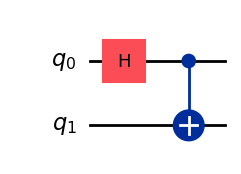

In [ ]:
from qiskit import QuantumCircuit

# Circuit cu 2 qubits
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')



Un qubit este o superpozitie de 0 si 1


Doi qubits pot sa fie simulan o superpozitie 00, 01, 10 si 11

Daca incercam acum sa efectuam un calcul cu acesti 2 qubits vom optine o superpozitie cu rezultatul calculului pentru toate cele 4 stari

Problema este ca atunci cand incercam sa masuram aceasta superpozitie nu obtinem decat o stare aleatoare din cele 4



### Pasul 1

fie N un numar natural, produs de 2 factori primi

fie g un numar prim fata de N

(A) g prim fata de N | (E) un numar e a.i. g^e = k * N + 1

### Pasul 2
g^e - 1 = k * N

(g^(e/2) - 1) * (g^(e/2) + 1) = k * N



### Pasul 3
Acum avem alte 2 valori care cel mai probabil au factori in comun cu N



### Pasul 4
Folosim algoritmul lui Euclid pentru a gasi cmmdc intre N si una dintre cele 2 valori

Folosim un calculator quantic pentru a face pasul 2 mai rapid


In [32]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a



N = 77
g = 8
aux = 8



e = 1
while aux % N != 1:
  aux = aux * g
  e += 1



if e % 2 == 1:
  print("Nu se poate, trebuie sa alegem alt g")
else:
  factor = gcd(g**(e/2) - 1, N)

print(factor, N/factor)



7.0 11.0


In [24]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

In [26]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.        , 0.0234375 , 0.0234375 , 1.        , 0.05078125,
       0.05078125]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.022096892, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001258264, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99945068359375, 'simulator_metadata': [{'time_taken': 0.022096892, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.001258264,

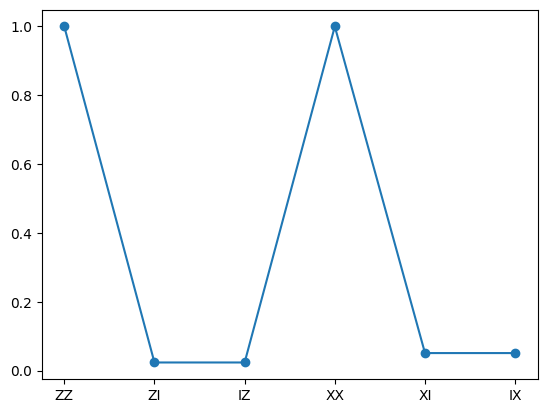

In [30]:
import matplotlib.pyplot as plt

data =['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']

values = job.result().values

plt.plot(data, values, '-o')
plt.show()